# Convergence of the Newmark scheme

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from functions import *

a=-1
b=1
N_mu = 5 #number of parameters

for tau = h:

In [6]:
n=8
Ns=np.power(2,np.linspace(3,n,num=n-2))
print("Ns : ", Ns)
Loss=np.zeros(len(Ns))

Mus = np.random.uniform(a,b,N_mu)
somme=fct(Mus, K = 2)

for i in range(len(Ns)):
    N=int(Ns[i])
    M=N
    h=1/(N+1)
    H=np.arange(1, N+1)*h

    #newmark sol:
    u_np, t = newmark(N, M, somme, tau = h, h = h)
    
    #sol exact
    uex=sol_given_fct2(somme) 
    y_ex_np = np.zeros(N)
    for k in range(N):
        y_ex_np[k] =uex(H[k],t)

    Loss[i]=np.sum((y_ex_np - u_np)**2)


Ns :  [  8.  16.  32.  64. 128. 256.]


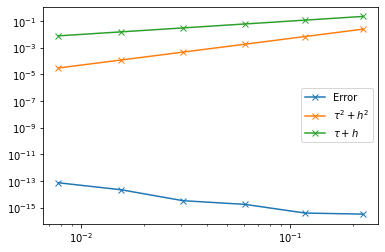

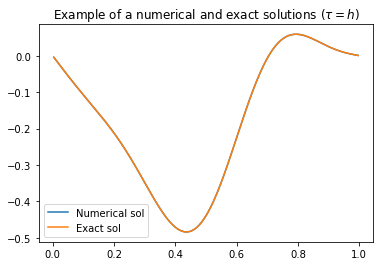

In [7]:
Hs=1/(Ns+1)
Tau=Hs
plt.plot(Hs+Tau, np.sqrt(Loss), '-x')
plt.plot(Hs+Tau, Hs**2+Tau**2, '-x')
plt.plot(Hs+Tau, Hs+Tau, '-x')
plt.legend(["Error", r"$\tau^2 + h^2$", r"$\tau + h$"])
plt.yscale('log')
plt.xscale('log')
plt.show()

plot_sol(N, u_np)
plot_sol(N, y_ex_np)
plt.legend(["Numerical sol", "Exact sol"])
plt.title(r"Example of a numerical and exact solutions ($\tau = h$)")
plt.show()

for tau < h:

Ns :  [  8.  16.  32.  64. 128. 256.]


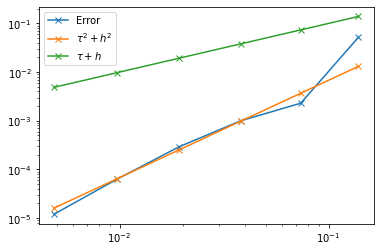

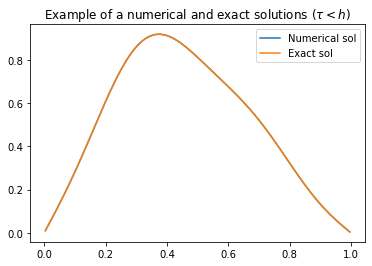

In [8]:
n=8
Ns=np.power(2,np.linspace(3,n,num=n-2))
print("Ns : ", Ns)
Loss=np.zeros(len(Ns))
Taus = np.zeros(len(Ns))
Mus = np.random.uniform(a,b,N_mu)
somme=fct(Mus, K = 2)

for i in range(len(Ns)):
    N=int(Ns[i])
    M=4*(N+1)
    h=1/(N+1)
    H=np.arange(1, N+1)*h
    tau = h/4
    Taus[i] = tau

    #newmark sol:
    u_np, t = newmark(N, M, somme, tau = tau, h = h)
    
    #sol exact
    uex=sol_given_fct2(somme) 
    y_ex_np = np.zeros(N)
    for k in range(N):
        y_ex_np[k] =uex(H[k],t)

    Loss[i]=np.sum((y_ex_np - u_np)**2)

Hs=1/(Ns+1)

plt.plot(Hs+Taus, np.sqrt(Loss), '-x')
plt.plot(Hs+Taus, Hs**2+Taus**2, '-x')
plt.plot(Hs+Taus, Hs+Taus, '-x')
plt.legend(["Error", r"$\tau^2 + h^2$", r"$\tau + h$"])
plt.yscale('log')
plt.xscale('log')
plt.show()

plot_sol(N, u_np)
plot_sol(N, y_ex_np)
plt.legend(["Numerical sol", "Exact sol"])
plt.title(r"Example of a numerical and exact solutions ($\tau < h$)")
plt.show()
